# Lập trình Python: phân tích tương quan bộ phận

### BS. Lê Ngọc Khả Nhi

# Mở đầu

Trong bài thực hành này, Nhi sẽ hướng dẫn các bạn code thủ công một module để thực hiện phân tích tương quan bộ phận (partial correlation) và bán bộ phận (semi-partial correlartion).

Ôn lại một chút về thống kê, phân tích tương quan là một quy trình rất phổ biến trong nghiên cứu y học khi ta muốn chứng minh về mối liên hệ giữa 2 biến số định lượng X, Y. Tuy nhiên, trong một số hoàn cảnh cả 2 biến X,Y đều có tương quan với một hay tập hợp nhiều hiệp biến khác và ta chỉ muốn khảo sát phần phương sai chung giữa X,Y mà thực sự độc lập với các hiệp biến Z, lúc này ta đang thực hiện phân tích tương quan bộ phận hoặc bán bộ phận.

**Cơ chế của quy trình này như sau:**

**Phân tích tương quan bộ phận:** dữ liệu đầu vào gồm 1 biến số X, 1 biến số Y, tập hợp hiệp biến số [Z]; Đầu tiên ta sẽ chuẩn hóa X,Y, Z về thang đo chuẩn hóa (Z-score), sau đó dựng 2 mô hình hồi quy tuyến tính X ~ Z và Y ~ Z. Hệ số tương quan giữa phần dư (residual) của 2 mô hình này chính là kết quả ta cần tìm.

**Phân tích tương quan bán bộ phận:** dữ liệu đầu vào gồm 1 biến số X, 1 biến số Y, tập hợp hiệp biến số cho riêng X [cov_X] và/hoặc tập hợp hiệp biến số cho riêng Y [cov_Y];

Đầu tiên ta sẽ chuẩn hóa tất cả biến số về thang đo chuẩn hóa (Z-score), 
Sau đó hiệu chỉnh cho riêng X và/hoặc Y, với mô hình hồi quy tuyến tính duy nhất X ~ cov_X và/hoặc Y ~ cov_Y
Cuối cùng, ta phân tích tương quan giữa phần dư của 2 mô hình này (nếu hiệu chỉnh cả 2), hoặc giữa X và phần dư mô hình dự báo Y (nếu chỉ hiệu chỉnh Y). Hệ số tương quan này chính là kết quả ta cần tìm.

# Bài toán minh họa

Cho bài thực hành này, Nhi sử dụng 1 bộ dữ liệu về chức năng hô hấp của 587 bệnh nhân tại 1 khoa nội hô hấp, gồm 7 biến số: Tuổi, Haemoglobin, và 5 thông số chức năng hô hấp: TLCO và KCO đo lường chức năng trao đổi khí qua màng phế nang mao mạch, TLC và FVC đo lường dung tích phổi bằng 2 kỹ thuật khác nhau, FEV1 đo lường khả năng thông khí gắng sức bằng hô hấp kí.

Giả định 1 bác sĩ muốn khảo sát về mối liên hệ giữa KCO: hằng số trao đổi khí và FEV1: thể tích thờ ra gắng sức trong 1 giây. Về mặt sinh lý: KCO có thể phụ thuộc vào nồng độ Hb, và diện tích màng phế nang, diện tích này lại tỉ lệ thuận với dung tích phổi (TLC, FVC...); FEV1 cũng phụ thuộc vào dung tích phổi (vì sức chứa phải lớn thì mới có đủ thể tích mà thở ra chứ !). Cả 2 lại cùng phụ thuộc vào tuổi bệnh nhân.

Mạng lưới quan hệ này đặt ra một bài toán phân tích tương quan bộ phận điển hình.

Toàn bộ code đều nằm trong module partial_corr mà Nhi sẽ import sau đây:

In [1]:
from partial_corr import *

# Phân tích code

Trong module này, có 2 function quan trọng nhất, là _cor() và partial_correlation()

Hàm _cor() cho phép phân tích tương quan (tính r và giá trị p) giữa 2 biến số xs, ys ở dạng pandas Series.

Hàm partial_correlation() là hàm chính để thực hiện phân tích tương quan bộ phận.

**@register_dataframe_method decorator**

Trong bài này, Nhi sử dụng 1 decorator từ thư viện pandas_flavor là @register_dataframe_method, nó cho phép biến bất cứ hàm nào bạn viết thành 1 method của pandas.DataFrame, thí dụ hàm partial_correlation() có thể sử dụng theo 2 cách, như 1 hàm rời:

partial_correlation(data = df, **kwargs);

hoặc như 1 method của df:

df.partial_correlation(**kwargs)

Trong hàm partial_correlation(), bạn có thể học một vài kinh nghiệm sử dụng assert kiểm tra tính hợp lệ của arguments và của dữ liệu để áp dụng lại cho các hàm thống kê của mình, nhằm cải thiện tính linh động của hàm, phòng tránh tình huống sai sót về cú pháp gây gián đoạn quy trình thi hành.

Phần code của quy trình Partial và Semi-partial correlation như sau:
Ghi chú: hồi quy tuyến tính được code hoàn toàn thủ công bằng numpy, mô hình fit bằng least-squared.

In [ ]:
if covar is not None:
    # Phân tích tương quan bộ phận
    cov_mat = np.atleast_2d(std_df[covar])
    W_x, W_y = np.linalg.lstsq(cov_mat, std_df[x], rcond=None)[0], np.linalg.lstsq(cov_mat, std_df[y], rcond=None)[0]
    resid_x, resid_y = std_df[x] - cov_mat@W_x, std_df[y] - cov_mat@W_y
        
else:
    # Phân tích tương quan bán bộ phận
    resid_x, resid_y = std_df[x], std_df[y]
    
    if x_covar is not None:
        cov_mat = np.atleast_2d(std_df[x_covar])
        W_x = np.linalg.lstsq(cov_mat, std_df[x], rcond=None)[0]
        resid_x = std_df[x] - cov_mat@W_x
    if y_covar is not None:
        cov_mat = np.atleast_2d(std_df[y_covar])
        W_y = np.linalg.lstsq(cov_mat, std_df[y], rcond=None)[0]
        resid_x = std_df[y] - cov_mat@W_y
        
pr,pp_val = _cor(xs = resid_x, ys = resid_y, method = method)
    
# Tương quan toàn thể
r,p_val = _cor(xs = std_df[x], ys = std_df[y], method = method)

# Sử dụng 

Đầu tiên ta tải dữ liệu vào pandas dataframe df:

In [2]:
df = pd.read_csv('pcor_data.csv', sep = ';')

df

,Age,TLCO,FEV1,TLC,KCO,Hb,FVC
0,36.473973,5.62,3.18,4.70,1.240000,13.6,3.56
1,37.005479,5.61,2.66,4.42,1.410000,13.4,2.96
2,37.526027,6.02,2.57,4.19,1.550000,13.1,2.95
3,38.098630,6.14,2.65,4.63,1.530000,14.2,3.03
4,40.575342,7.47,2.52,5.46,1.530000,13.8,3.45
...,...,...,...,...,...,...,...
582,58.424658,4.96,1.58,4.58,1.498489,11.8,1.98
583,87.432877,3.15,1.80,5.44,0.766423,13.5,2.48
584,34.161644,5.42,2.72,5.23,1.193833,12.6,3.43
585,72.430137,4.84,2.57,5.83,1.056769,11.9,3.28


Như đã trình bày, hàm partial_correlation() có thể sử dụng như 1 method của pandas dataframe df, nhưng trước hết Nhi trình diễn 1 số ngoại lệ do sai cú pháp hay đối số, lúc này hàm sẽ báo lỗi.

In [4]:
# Không cho phép dùng cả 2: covar và x_covar

partial_correlation(data = df, x = 'FEV1', y = 'KCO',
                    covar = 'Age', 
                    x_covar = 'FVC', 
                    y_covar = None,
                    method = 'spearman')

ValueError: Lỗi: Không thể áp dụng đồng thời cả 2: covar và x_covar hoặc y_covar

In [7]:
# covar không thể là x hoặc y:

partial_correlation(data = df, 
                    x = 'FEV1', 
                    y = 'KCO',
                    covar = 'FEV1',
                    method = 'spearman')

AssertionError: Lỗi: tập hợp covar không thể bao gồm biến FEV1

In [9]:
# Sai tên method

partial_correlation(data = df, 
                    x = 'FEV1', 
                    y = 'KCO',
                    covar = ['FVC','Age'],
                    method = 'pearman')

ValueError: Không nhận ra pearman, chỉ hỗ trợ method spearman, pearson hoặc kendalltau

In [11]:
# Sai tên biến FCV thay vì FVC

partial_correlation(data = df, 
                    x = 'FEV1', 
                    y = 'KCO',
                    covar = ['FCV','Age'],
                    method = 'Spearman')

AssertionError: Không tìm thấy biến FCV trong dataframe

## Phân tích tương quan bộ phận

Ta giải quyết bài toán nêu trên; phân tích tương quan bộ phận giữa FEV1 và KCO, sau khi đã hiệu chỉnh cho cả 2 với tập hợp 3 covariates là Age, Hb và FVC:

Kết quả cho thấy sau khi hiệu chỉnh, phần phương sai độc lập của FEV1 và KCO không có mối liên hệ nào với nhau: r = 0.26, p = 0.139

Nếu không dùng partial corr mà chỉ phân tích tương quan đơn giản, FEV1 tương quan rất mạnh với KCO. 

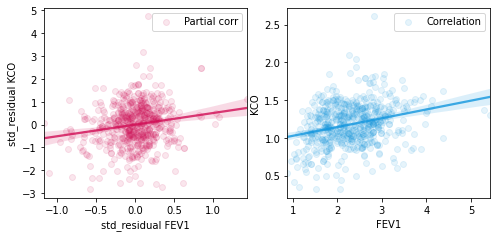

,Toàn phần,Bộ phận
Hệ số tương quan spearman,2.603595e-01,0.138838
Giá trị p,1.731938e-10,0.000776


In [3]:
df.partial_correlation(x = 'FEV1', y = 'KCO',
                    covar = ['Age','Hb','FVC'], 
                    method = 'spearman')

## Phân tích tương quan bán bộ phận

Tiếp theo, ta làm 1 phân tích semi-partial corr, hiệu chỉnh riêng cho KCO bằng TLC, Age và Hb, hiệu chỉnh riêng cho FEV1 bằng FVC và Age:

Kết quả cũng là âm tính: sau khi hiệu chỉnh cho mỗi biến, ta không tìm thấy mối tương quan ý nghĩa nào giữa KCO và FEV1

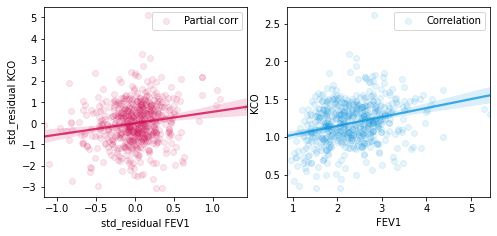

,Toàn phần,Bộ phận
Hệ số tương quan pearson,2.766296e-01,0.166294
Giá trị p,9.010914e-12,0.000052


In [4]:
df.partial_correlation(x = 'FEV1', 
                       y = 'KCO',
                       x_covar = ['Age','FVC'], 
                       method = 'pearson')

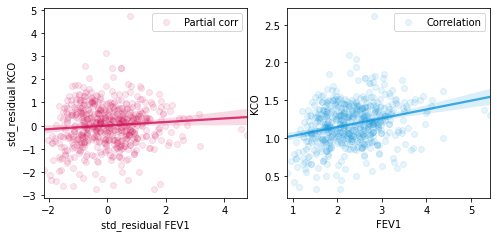

,Toàn phần,Bộ phận
Hệ số tương quan pearson,2.738841e-01,0.085040
Giá trị p,1.721145e-11,0.040107


In [5]:
df.partial_correlation(x = 'FEV1', 
                       y = 'KCO',
                       y_covar = ['Age','Hb','TLC',], 
                       method = 'pearson')

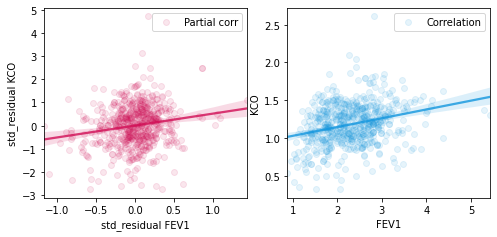

,Toàn phần,Bộ phận
Hệ số tương quan pearson,2.738841e-01,0.174501
Giá trị p,1.721145e-11,0.000023


In [6]:
df.partial_correlation(x = 'FEV1', 
                       y = 'KCO',
                       x_covar = ['Age','FVC'], 
                       y_covar = ['Age','Hb','TLC',],
                       method = 'pearson')

# Tổng kết

Bài thực hành đến đây là hết, các bạn có thể đọc lại source code nằm trong module để hiểu rõ cơ chế hoạt động của quy trình. Partial correlation là một kỹ thuật thống kê cổ điển nhưng khá hiệu quả vì như đã giải thích, trong một số hoàn cảnh nó cho ra kết quả chính xác hơn và hữu ích hơn để chứng minh giả thuyết về liên hệ, so với chỉ phân tích tương quan bình thường. Tuy nhiên, partial correlation vẫn chỉ là một phân tích tương quan, nên không bao giờ cho phép diễn giải về quan hệ nhân quả. Một lưu ý nữa là có một số thư viện (thí dụ pcorr trong R) cho phép thực hiện partial correlation cho toàn bộ một dataframe hay matrix), tuy nhiên Nhi không thực sự thích cách làm máy móc này, quy trình phân tích bắt cặp cụ thể, xác định cụ thể tập hợp covariates dựa trên giả thuyết khoa học vẫn tốt hơn. Chúc các bạn thực hành vui.